# Exploratory data plotting

This is an exploratory plotting notebook, to play around with the data, try different plots, and see which ones will be the most effective for the report.

In [1]:
import pandas as pd
import json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# final 1500 tweets

df = pd.read_csv("data/scraped/final_data.tsv", delimiter="\t")
df = df[['text', 'sentiment', 'category']]
#df = df[0:750]
df = df[~(df['category'] == 'Remove')]

# save 200  tweets for open coding - deciding what categories to go with
#df.to_csv("200_tweets_open_coding.tsv", sep="\t", index=False)

In [3]:
counts = {}
sentiments = ['Neutral', 'Negative', 'Positive']

for cat in df['category'].unique():
    sentsDict = {}
    for sent in sentiments:
        sentsDict[sent] = len(df[np.logical_and(df['category'] == cat, df['sentiment'] == sent)])
        
        
    counts[cat] = sentsDict

In [5]:
# count of each sentiment in each category

print(json.dumps(counts, indent=True))

{
 "Informative posts": {
  "Neutral": 206,
  "Negative": 6,
  "Positive": 6
 },
 "Critique and opinions": {
  "Neutral": 133,
  "Negative": 203,
  "Positive": 22
 },
 "Compassion and sentiment": {
  "Neutral": 32,
  "Negative": 20,
  "Positive": 24
 },
 "Jokes and sarcasm": {
  "Neutral": 43,
  "Negative": 11,
  "Positive": 4
 },
 "Informative questions": {
  "Neutral": 27,
  "Negative": 1,
  "Positive": 0
 }
}


In [6]:
tot = 0

for key in counts.keys():
    for v in counts[key].keys():
        tot += counts[key][v]

print(tot)

# total number of tweets

738


In [7]:
# only change counts dict to be out of ~1035 tweets and the rest will be fixed

fac = 1050 / 738 # factor needed to make numbers sum up to ~1000

counts['Informative posts']

for key in counts.keys():
    for v in counts[key].keys():
        counts[key][v] = int(counts[key][v]*fac)

In [50]:
# all sentiment counts now add up to ~1000

print(json.dumps(counts, indent=True))

{
 "Informative posts": {
  "Neutral": 293,
  "Negative": 8,
  "Positive": 8
 },
 "Critique and opinions": {
  "Neutral": 189,
  "Negative": 288,
  "Positive": 31
 },
 "Compassion and sentiment": {
  "Neutral": 45,
  "Negative": 28,
  "Positive": 34
 },
 "Jokes and sarcasm": {
  "Neutral": 61,
  "Negative": 15,
  "Positive": 5
 },
 "Informative questions": {
  "Neutral": 38,
  "Negative": 1,
  "Positive": 0
 }
}


In [51]:
tot = 0

for key in counts.keys():
    for v in counts[key].keys():
        tot += counts[key][v]

print(tot)

1044


In [52]:
# store dictionary data in a df in order to plot it

df_counts = pd.DataFrame()

for key, val in counts.items():
    df_counts = df_counts.append([[key, 'Neutral', val['Neutral']]])
    df_counts = df_counts.append([[key, 'Negative', val['Negative']]])
    df_counts = df_counts.append([[ str(key), 'Positive', val['Positive']]])

df_counts.columns = ['Category', 'Sentiment', 'Counts']

## Following are different plot types and styles I generated to choose from for the report

<Figure size 6500x1500 with 0 Axes>

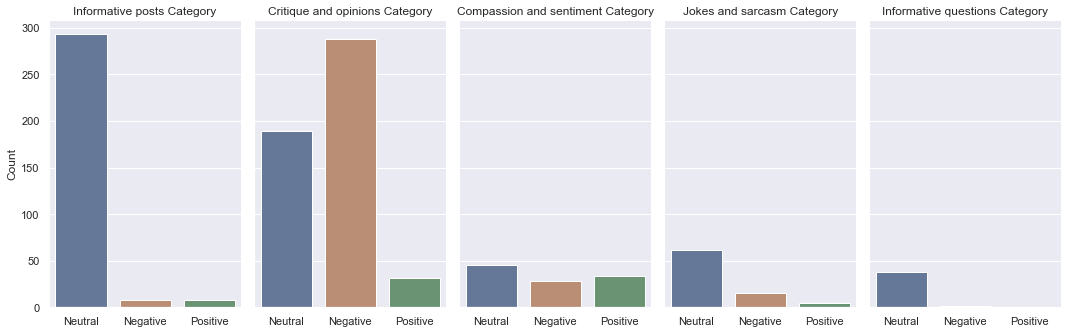

In [53]:
plt.figure(figsize=(13, 3), dpi = 500) 
g = sns.catplot(x='Sentiment', y='Counts', col='Category', data=df_counts, kind='bar', saturation=0.5, ci=None, aspect=.6)
(g.set_axis_labels("", "Count")
  .set_xticklabels(["Neutral", "Negative", "Positive"])
  .set_titles("{col_name} {col_var}"))

[Text(0, 0, '293'),
 Text(0, 0, '189'),
 Text(0, 0, '45'),
 Text(0, 0, '61'),
 Text(0, 0, '38')]

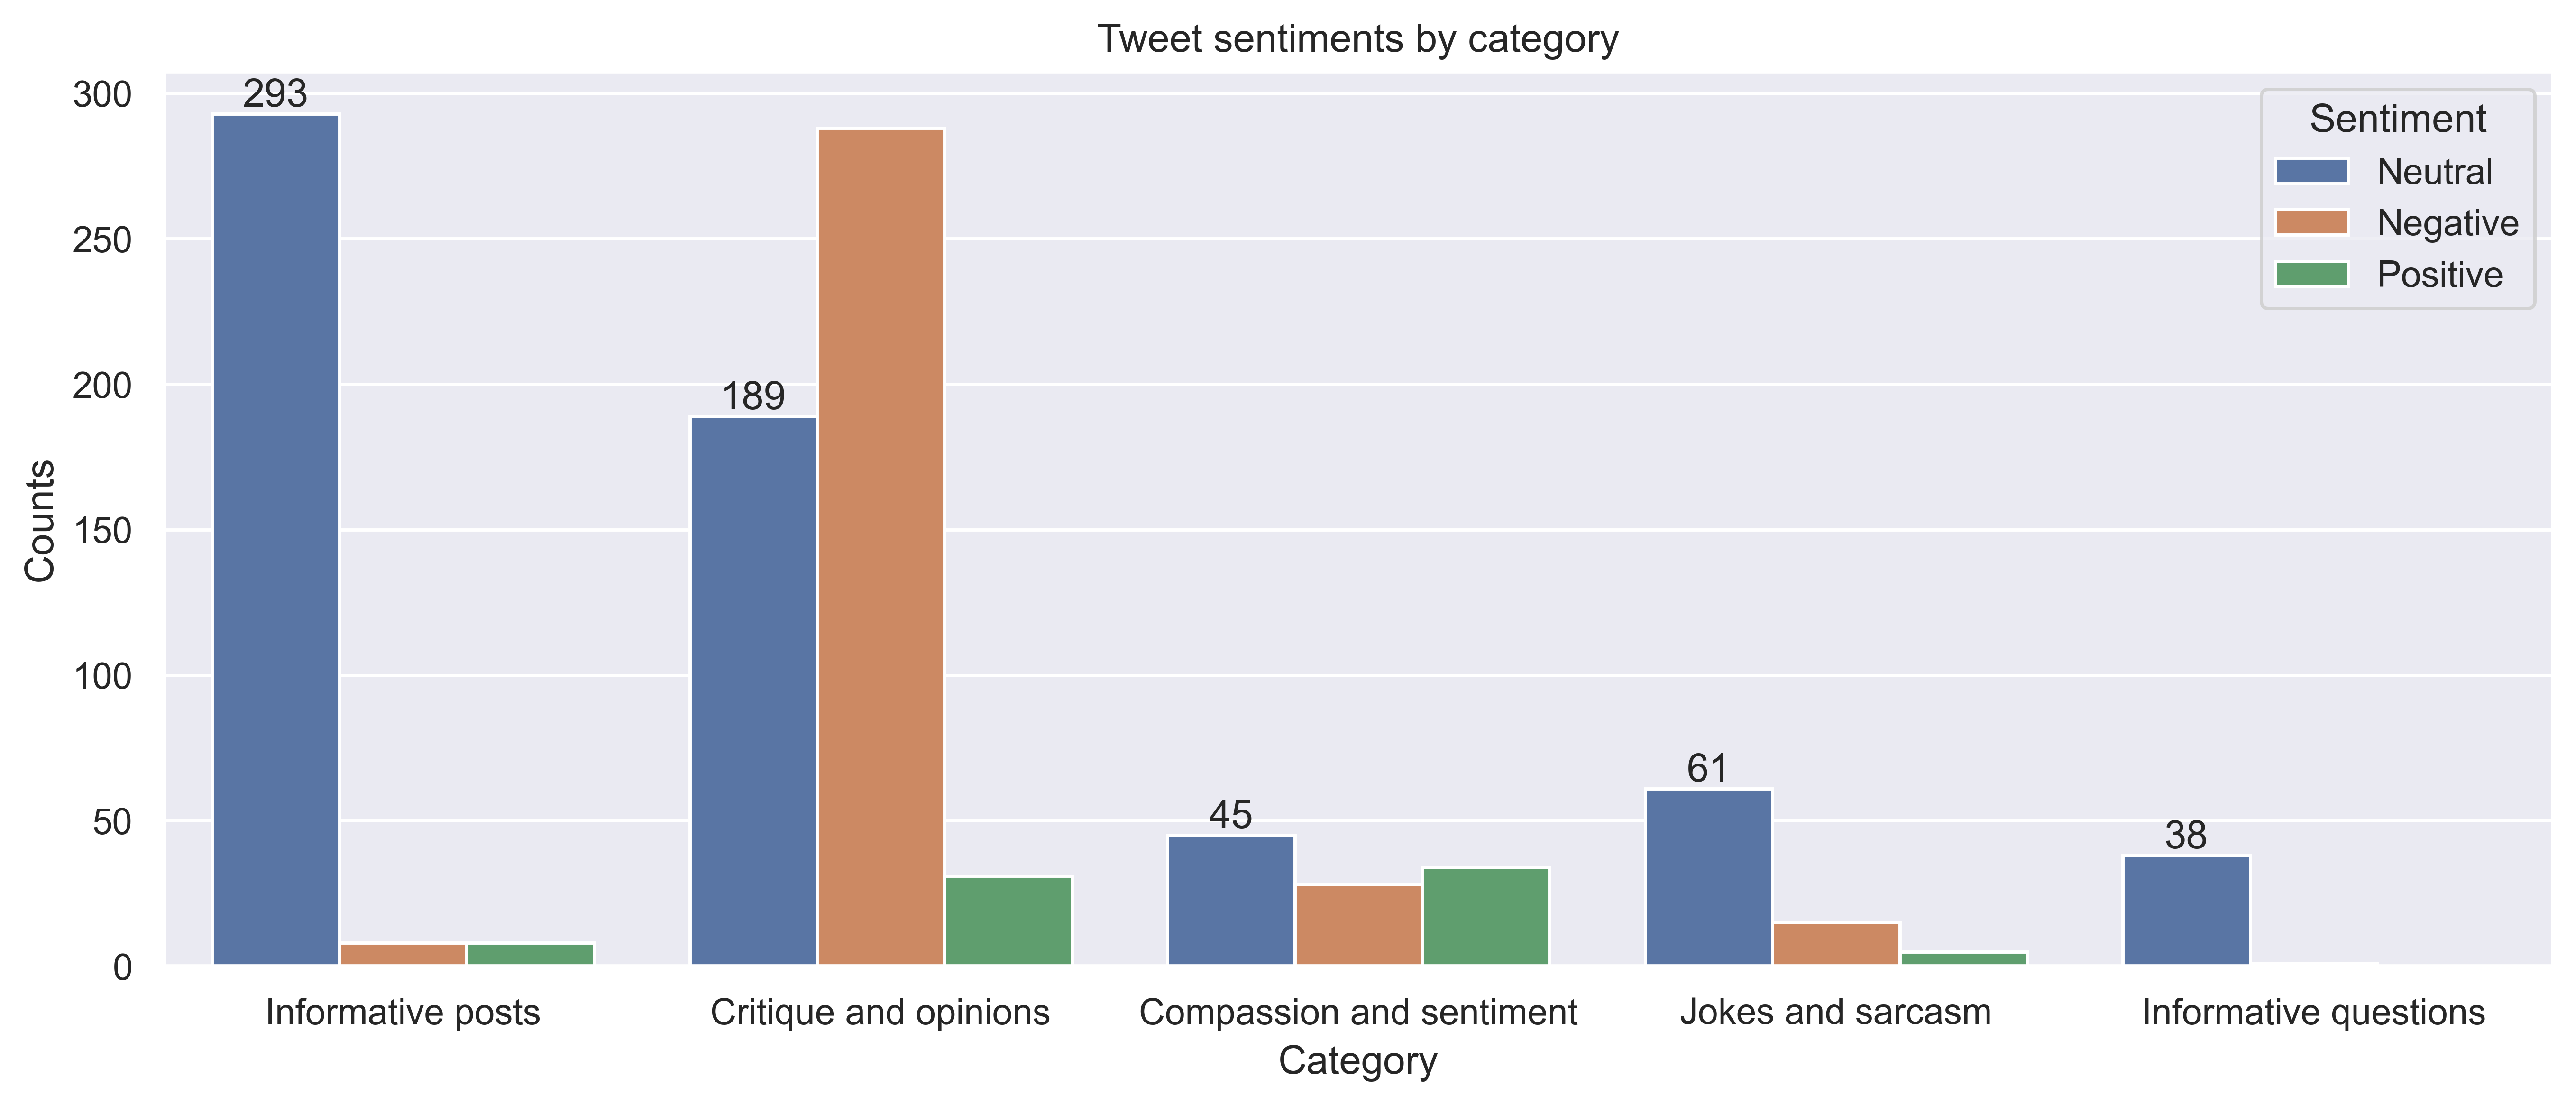

In [54]:
plt.figure(figsize=(13, 5), dpi = 500) 
sns.set(rc = {'figure.figsize':(15,8)})
ax = sns.barplot(x='Category', y='Counts', hue='Sentiment', data=df_counts)
ax.set_title("Tweet sentiments by category")
ax.bar_label(ax.containers[0])

#plt.savefig('cats_and_sents.jpeg')

[Text(0, 0, '309'),
 Text(0, 0, '508'),
 Text(0, 0, '107'),
 Text(0, 0, '81'),
 Text(0, 0, '39')]

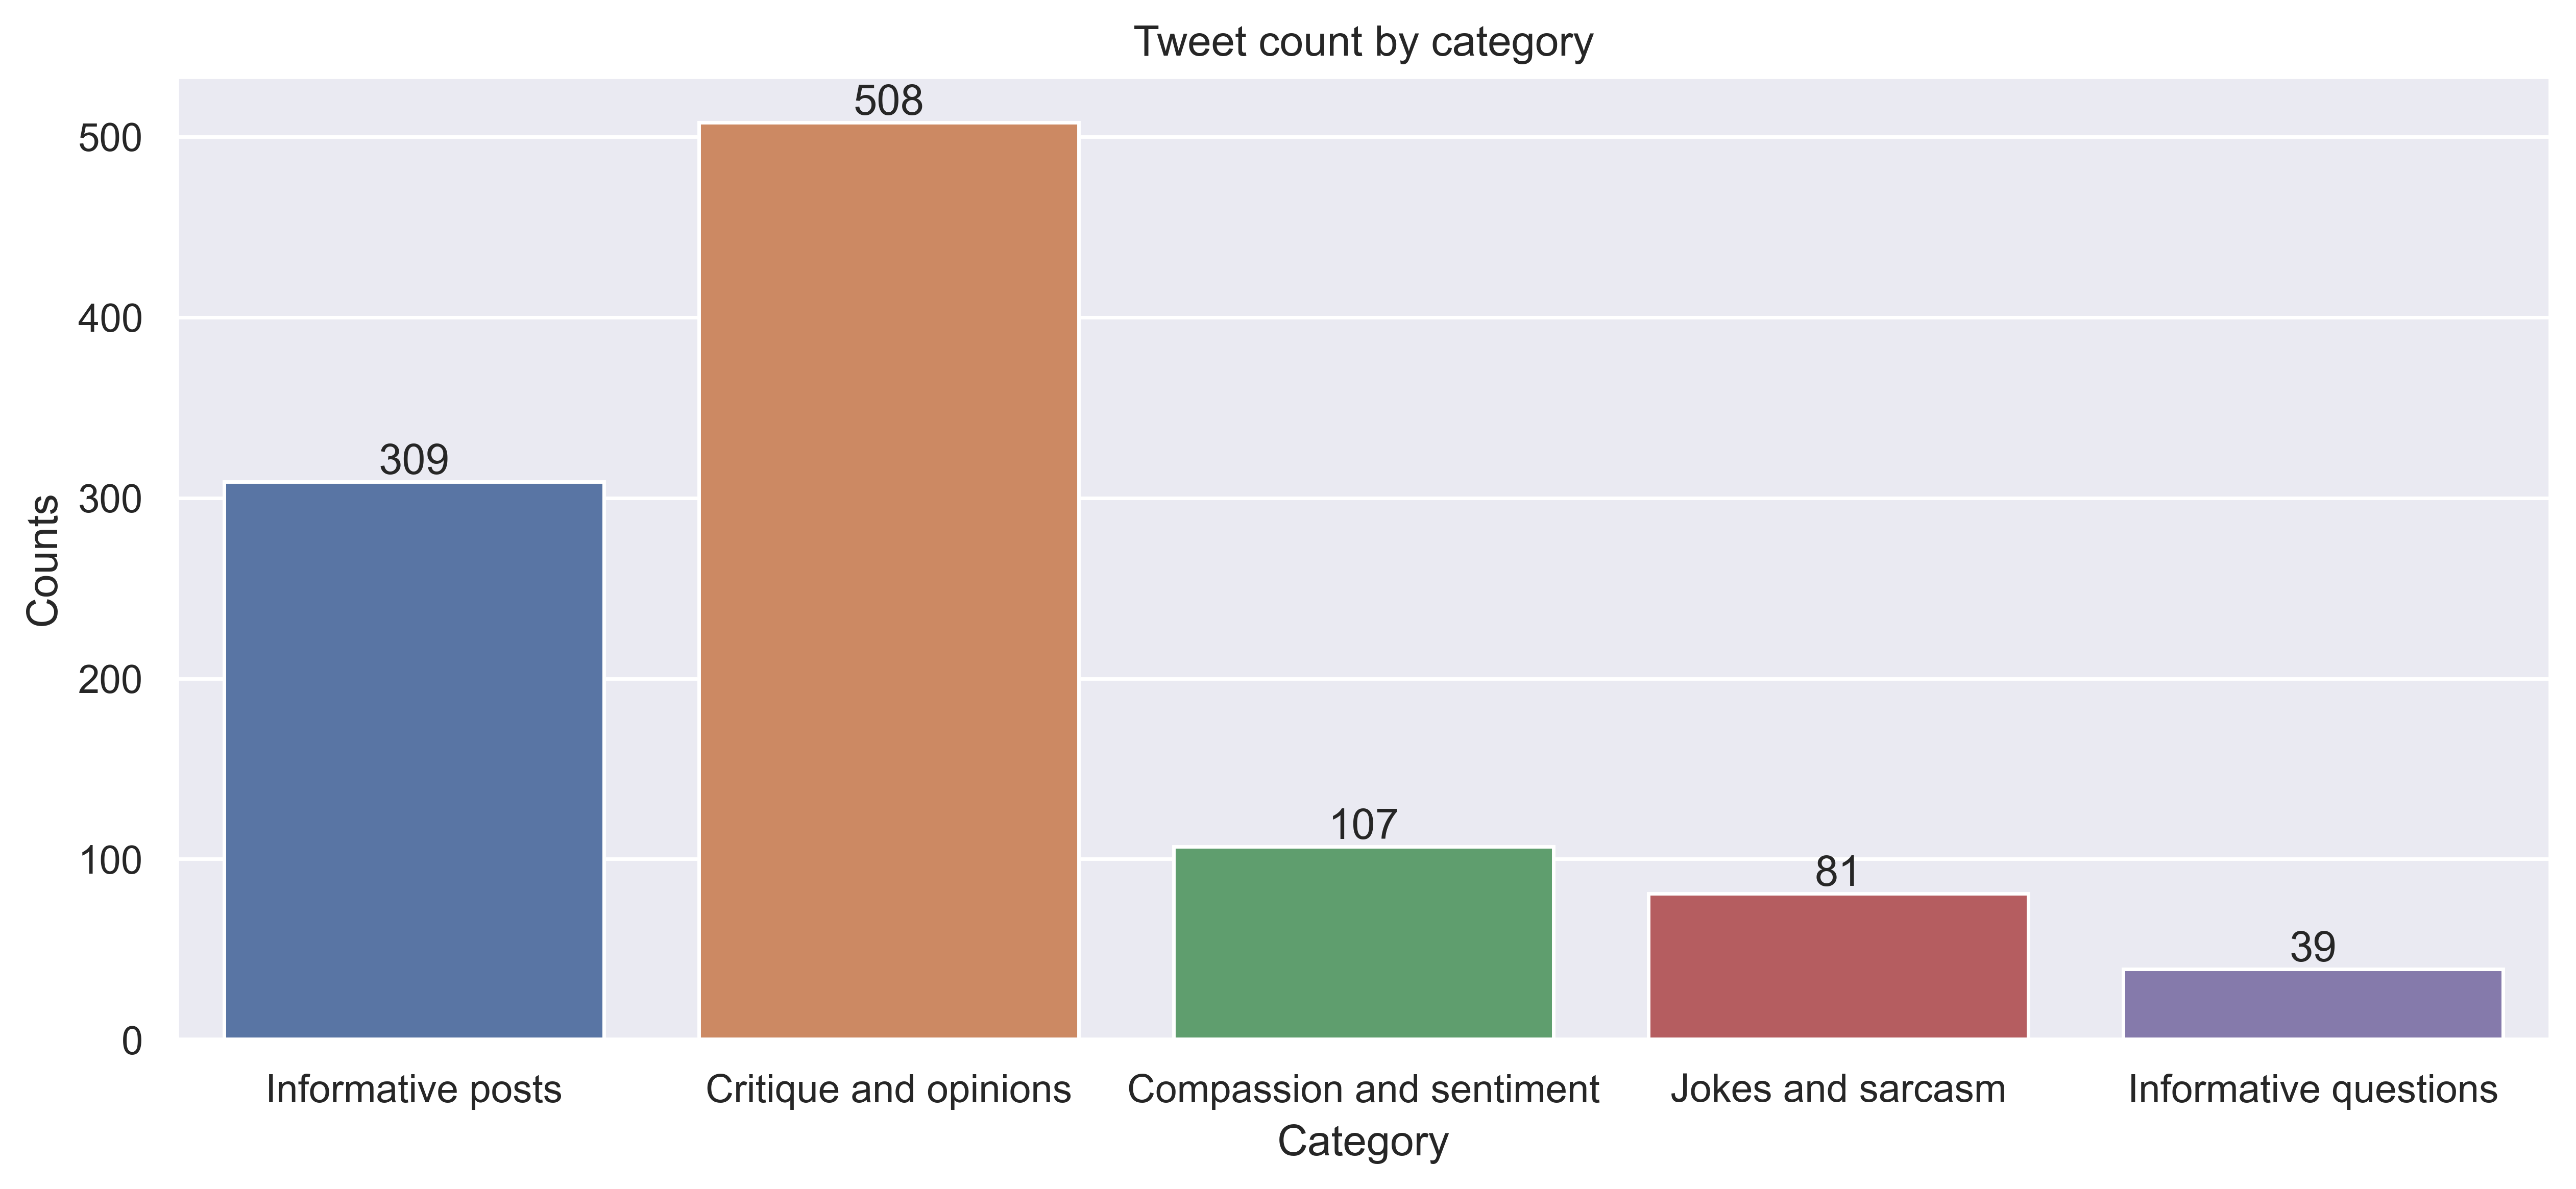

In [55]:
plt.figure(figsize=(12, 5), dpi = 500) 
ax = sns.barplot(x='Category', y='Counts', data=df_counts, ci=None, estimator=sum)
ax.set_title("Tweet count by category")
ax.bar_label(ax.containers[0])

#plt.savefig('cat.jpeg')

In [56]:
# create a new df that will allow to plot all sentiment annotations of each category in one bar plot

df_counts_plotter = pd.DataFrame(counts)

In [57]:
df_counts_plotter = df_counts_plotter.T
df_counts_plotter['total'] = df_counts_plotter.sum(axis=1)


In [58]:
df_counts_plotter

,Neutral,Negative,Positive,total
Informative posts,293,8,8,309
Critique and opinions,189,288,31,508
Compassion and sentiment,45,28,34,107
Jokes and sarcasm,61,15,5,81
Informative questions,38,1,0,39


In [59]:
df_counts_bar_labels = []
df_counts_bar_labels = list(df_counts_plotter[['total']].T)
df_counts_bar_labels

['Informative posts',
 'Critique and opinions',
 'Compassion and sentiment',
 'Jokes and sarcasm',
 'Informative questions']

In [11]:
# positive : negative : neutral tweets ratios

print(1, ':', round(340/78), ':', round(626/78))

# 8 times more neutral tweets than positive tweets!
# 2 times more neutral tweets than negative tweets!

1 : 4 : 8


In [61]:
# change row names to what is in the report, so the labels in the plot below fit
df_counts_plotter.index = ['Informative', 'Critique', 'Personal', 'Sarcasm', 'Questions']
df_counts_plotter

,Neutral,Negative,Positive,total
Informative,293,8,8,309
Critique,189,288,31,508
Personal,45,28,34,107
Sarcasm,61,15,5,81
Questions,38,1,0,39


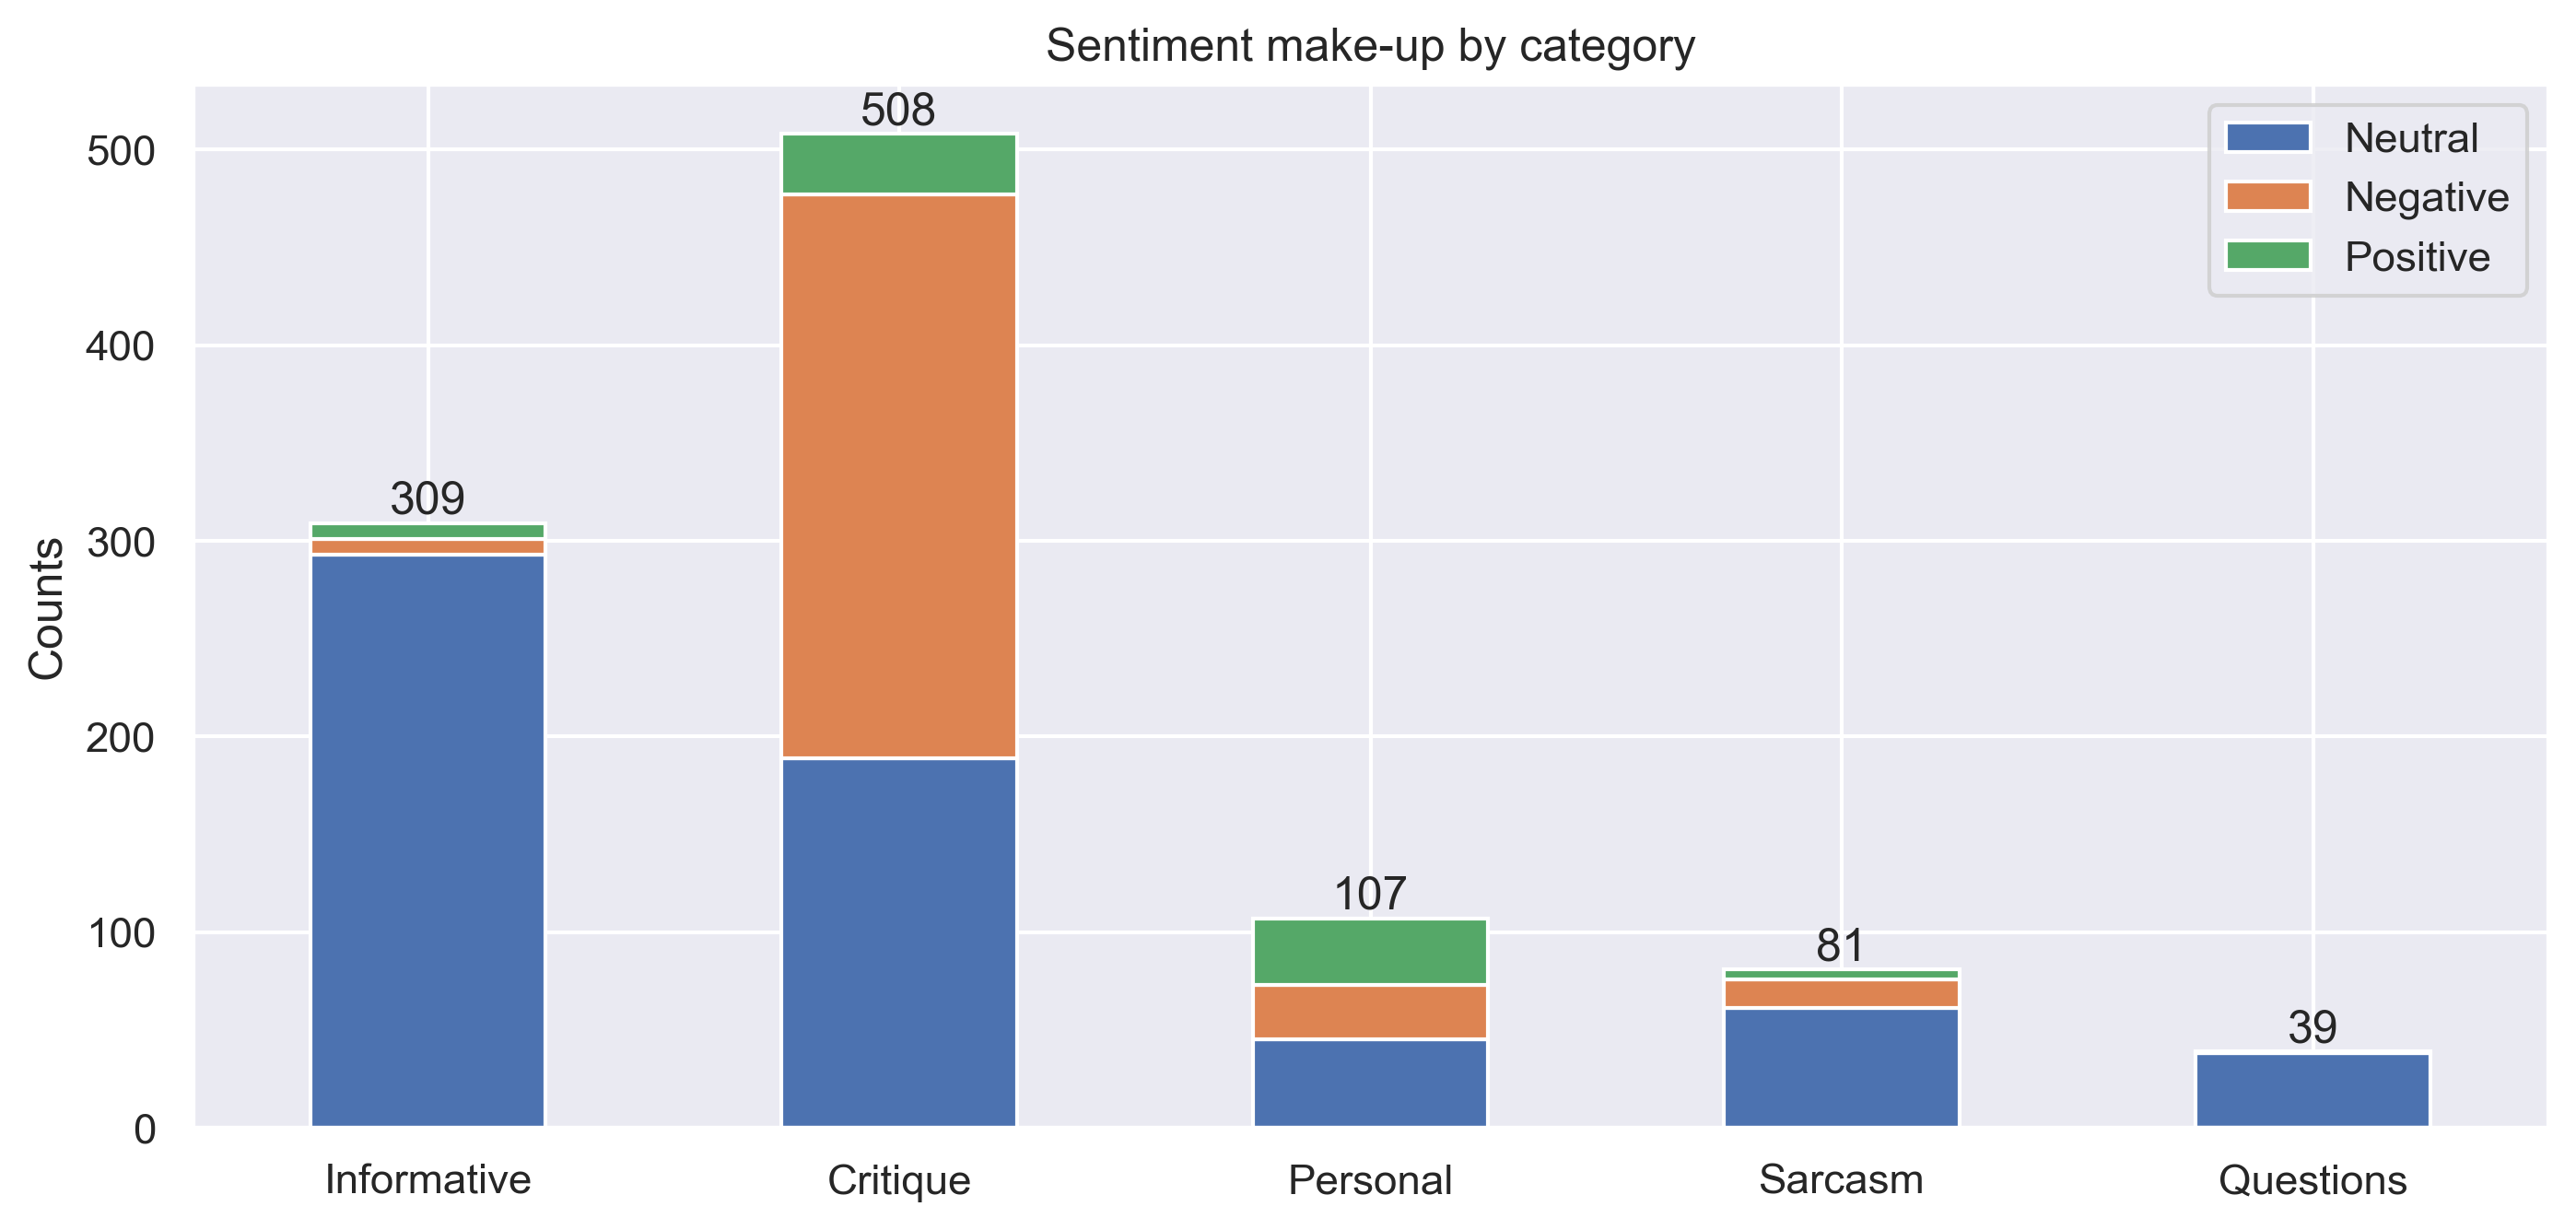

In [62]:
fig = plt.figure(figsize=(11, 5), dpi = 300) 
ax = df_counts_plotter.drop(columns='total').plot(kind='bar', stacked=True, rot=0, title="Sentiment make-up by category", ax = plt.gca())

# this only prints total values
#plt.bar_label(ax.containers[2])

ax.containers[2].patches[4] = ax.containers[1].patches[4]
ax.bar_label(ax.containers[2])


#print(ax.containers[1].patches[4].get_height())
plt.ylabel("Counts")
#plt.xlabel("Category")
plt.legend(loc=1)

#plt.savefig('cat_sent_makeup.png')


## Plotting tf-idf

In [13]:
#f = open('data/category.json')
f = open('data/category.json')

cat_idf = json.load(f)
f.close()

#f = open('data/sentiment.json')
f = open('data/sentiment.json')
sent_idf = json.load(f)
f.close()

cat_idf.pop('Remove')

{'100k': 0.0,
 'place': 0.0,
 'piec': 0.0,
 'piet457': 0.0,
 'pile': 0.0,
 'pill': 0.0,
 'piss': 0.0,
 'pivot': 0.0,
 'pixel': 0.0,
 'pizdets17': 0.0,
 'pj': 0.0}

In [14]:
cat_idf['Informative questions']

{'covid': 0.563781656461459,
 'vaccin': 0.23063795037059684,
 'test': 0.2077225905289948,
 'curiou': 0.15005915686338792,
 'get': 0.12813219465033157,
 'wait': 0.10388781839961213,
 'know': 0.10250575572026525,
 'mouth': 0.10003943790892528,
 'jatetro': 0.10003943790892528,
 'sampl': 0.10003943790892528,
 'instanc': 0.10003943790892528}

In [15]:
for key in cat_idf:
    cat_idf[key].pop('covid')

In [16]:
for key in sent_idf:
    sent_idf[key].pop('covid')

In [17]:
cat_idf['Informative posts']

{'case': 0.40488758266791935,
 'new': 0.3877511602877336,
 'variant': 0.2908133702158002,
 'vaccin': 0.2203131592543941,
 'report': 0.214352249647722,
 'death': 0.17631321231240826,
 'omicron': 0.15421921147807585,
 'health': 0.14885572892202917,
 'via': 0.1020464401580129,
 'canada': 0.09694411815011225}

In [18]:
pd.DataFrame(cat_idf)[['Informative posts']].dropna().T

,case,new,variant,vaccin,report,death,omicron,health,via,canada
Informative posts,0.404888,0.387751,0.290813,0.220313,0.214352,0.176313,0.154219,0.148856,0.102046,0.096944


In [19]:
pd.DataFrame(sent_idf)[['Positive']].dropna().T.sort_values(by='Positive', axis=1, ascending=False)

,get,vaccin,first,shot,got,kid,time,dress,also,today
Positive,0.257542,0.243234,0.157386,0.128771,0.100155,0.100155,0.100155,0.096901,0.085847,0.085847


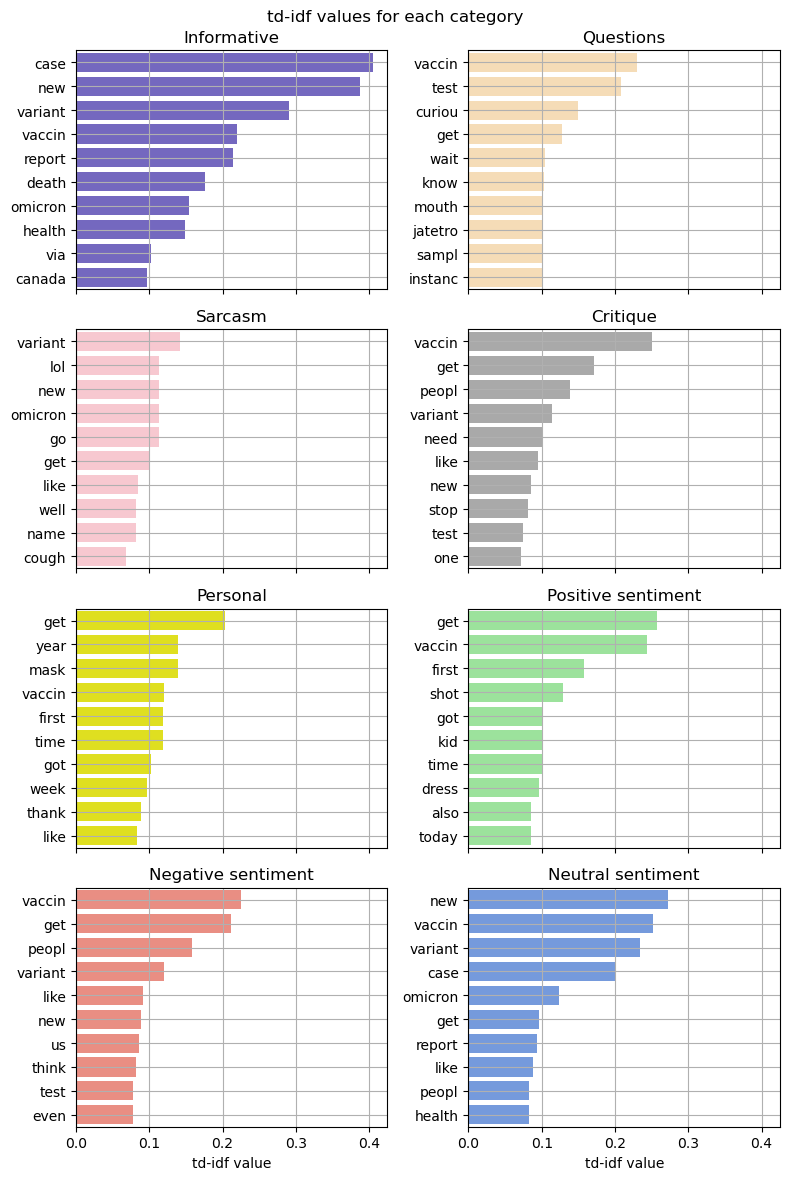

In [21]:
#plt.figure(figsize=(10,12), dpi = 500) 
fig, axes = plt.subplots(4, 2, sharex=True, figsize=(8,12), dpi=100)

fig.suptitle('td-idf values for each category')

ax1 = sns.barplot(ax=axes[0, 0], data=pd.DataFrame(cat_idf)[['Informative posts']].dropna().T.sort_values(by='Informative posts', axis=1, ascending=False), orient='h', color='slateblue')
ax1.set(title="Informative")
ax1.grid(visible=True, axis='both')

ax2 = sns.barplot(ax=axes[0, 1], data=pd.DataFrame(cat_idf)[['Informative questions']].dropna().T.sort_values(by='Informative questions', axis=1, ascending=False), orient='h', color='navajowhite')
ax2.set(title="Questions")
ax2.grid(visible=True, axis='both')

ax3 = sns.barplot(ax=axes[1, 0], data=pd.DataFrame(cat_idf)[['Jokes and sarcasm']].dropna().T.sort_values(by='Jokes and sarcasm', axis=1, ascending=False), orient='h', color='pink')
ax3.set(title="Sarcasm")
ax3.grid(visible=True, axis='both')

ax4 = sns.barplot(ax=axes[1,1], data=pd.DataFrame(cat_idf)[['Critique and opinions']].dropna().T.sort_values(by='Critique and opinions', axis=1, ascending=False), orient='h', color='darkgray')
ax4.set(title="Critique")
ax4.grid(visible=True, axis='both')

ax5 = sns.barplot(ax=axes[2,0],data=pd.DataFrame(cat_idf)[['Compassion and sentiment']].dropna().T.sort_values(by='Compassion and sentiment', axis=1, ascending=False), orient='h', color='yellow')
ax5.set(title="Personal")
ax5.grid(visible=True, axis='both')

ax6 = sns.barplot(ax=axes[2,1],data=pd.DataFrame(sent_idf)[['Positive']].dropna().T.sort_values(by='Positive', axis=1, ascending=False), orient='h', color='lightgreen')
ax6.set(title="Positive sentiment")
ax6.grid(visible=True, axis='both')

ax7 = sns.barplot(ax=axes[3,0],data=pd.DataFrame(sent_idf)[['Negative']].dropna().T.sort_values(by='Negative', axis=1, ascending=False), orient='h', color='salmon')
ax7.set(title="Negative sentiment", xlabel='td-idf value')
ax7.grid(visible=True, axis='both')

ax8 = sns.barplot(ax=axes[3,1],data=pd.DataFrame(sent_idf)[['Neutral']].dropna().T.sort_values(by='Neutral', axis=1, ascending=False), orient='h', color='cornflowerblue')
ax8.set(title="Neutral sentiment", xlabel='td-idf value')
ax8.grid(visible=True, axis='both')

plt.tight_layout()
#plt.savefig('tf-idf_fig.jpeg')


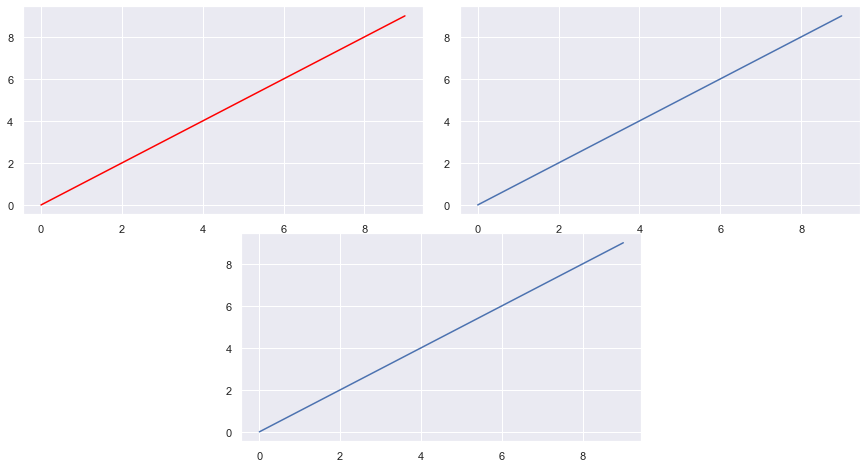

In [77]:
# example from a website

import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt

gs = gridspec.GridSpec(4, 4)

ax1 = plt.subplot(gs[:2, :2])
ax1.plot(range(0,10), range(0,10), color="red")

ax2 = plt.subplot(gs[:2, 2:])
ax2.plot(range(0,10), range(0,10))

ax3 = plt.subplot(gs[2:4, 1:3])
ax3.plot(range(0,10), range(0,10))

plt.show()

In [74]:
df[df['sentiment'] == 'Positive']['text'].str.contains('my')

9      False
16     False
43      True
44     False
55     False
57     False
60      True
77     False
84     False
107    False
119    False
140    False
176    False
181    False
193    False
196    False
206    False
216    False
226    False
227    False
232     True
246    False
262     True
270    False
301     True
302    False
321    False
335    False
338    False
368    False
373    False
441    False
442    False
457    False
459    False
468     True
474     True
484    False
486    False
492    False
493    False
496    False
578    False
593    False
596    False
605    False
612    False
623    False
635    False
652    False
662    False
663    False
696    False
704    False
713    False
716    False
Name: text, dtype: bool

In [73]:
df

,text,sentiment,category
0,Islanders' games postponed through Nov. 30 due...,Neutral,Informative posts
1,@RodKahx @CanuckTraveler @Dan_GT2 We need a di...,Negative,Critique and opinions
2,"""since Tuesday, more than 10,000 appointments ...",Neutral,Informative posts
3,"""Pregnancy can be an exciting time, but also o...",Neutral,Informative posts
4,@ShiroSpirit @Stonekettle If you read her orig...,Neutral,Critique and opinions
...,...,...,...
733,Who else is going to report new strains now?\n...,Negative,Informative posts
734,@fitterhappierAJ\n@nanogenomic\nhave you seen ...,Neutral,Critique and opinions
735,Worried about the new Covid-19 variant? It's a...,Neutral,Critique and opinions
736,COVID-19 Update: Canada bans entry from seven ...,Neutral,Informative posts
